# Data Processing

## Data cleaning 

In [1]:
import pandas as pd
from fuzzywuzzy import fuzz, process
raw_df = pd.read_excel (r'/Users/swimmingcircle/cs156_code/assignments/Final_project/long_form_poll_responses_2019.xlsx')

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#add time stamp as variable 
raw_df['time_stamp'] = raw_df['Polls ID'].rank(method = 'dense', ascending=True).astype(int)
raw_df.sort_values("time_stamp", inplace = True)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count')

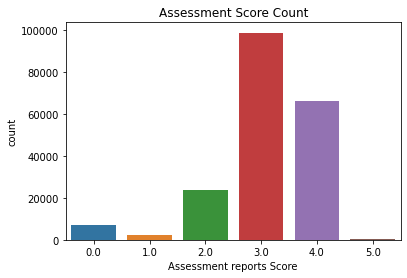

In [4]:
sns.countplot(raw_df['Assessment reports Score'])
plt.title('Assessment Score Count')

In [5]:
#average 
raw_df['Assessment reports Score'].mean()

3.0913772213247173

We can see that most polls are graded as 3, and more polls are graded as 4 than 2. In addition, we see 0 in the grade, which we will need to discard. In addition, the average poll grades is around 3.09.

## Grades for hashtags(HCs & LOs)

In [6]:
avg_grades = pd.DataFrame(raw_df.groupby('Assessment reports Hashtag')['Assessment reports Score'].agg(['mean', 'count']))
avg_grades = avg_grades.sort_values('mean', ascending= False).reset_index()

In [7]:
avg_grades

Assessment reports Hashtag      mean  count
0        #histonemodifications  4.000000      2
1            #LPimplementation  4.000000      1
2               #networktheory  4.000000      2
3               #Participation  4.000000      3
4                #Preparedness  4.000000      1
..                         ...       ...    ...
798              #buckinghampi  2.307692     39
799                        #DA  2.285714     49
800           #Rimplementation  2.178571     28
801            #accountability  1.750000      8
802                       NONE  0.040808   7082

[803 rows x 3 columns]

From the result, we can see that some hashtags have a high mean because of few data points. We might discard those hashtags if they bais the result. We will preserve the information for now. 

## Discard data 

- Discard polls that have NONE for Assessment reports Hashtag
- Discard polls that have't get graded 


In [8]:
df = raw_df[raw_df['Assessment reports Hashtag'] != 'NONE']
df = raw_df[raw_df['Assessment reports Score'] != 0.0]

In [9]:
df

Polls ID  Assessment reports Student ID  \
0        12522.0                           41.0   
16       12522.0                          335.0   
15       12522.0                          333.0   
14       12522.0                          318.0   
13       12522.0                          315.0   
...          ...                            ...   
198045  322265.0                         1120.0   
198046  322265.0                         1121.0   
198047  322265.0                         1126.0   
198034  322265.0                          719.0   
198079  322265.0                         9357.0   

                                  Poll Responses Response  \
0       The strengths of Plato's approach is his const...   
16      In the breakout we discussed if outside the ca...   
15      I think he's good at reasoning, but he has thi...   
14      Back to cmmon confusion time: the section 'und...   
13      Most difficult weakness is that his position w...   
...                                                   ...   
198045                                       Definiteness   
198046  I think important propoerties of algorithms in...   
198047  This is maybe not an additional property, but ...   
198034  comprehensibility.  This is related to efficie...   
198079  Adaptability: I'm not sure if it's actually ap...   

       Assessment reports Hashtag  Assessment reports Score  time_stamp  
0              #objectivemorality                       2.0           1  
16             #objectivemorality                       3.0           1  
15                  #deductivearg                       2.0           1  
14             #objectivemorality                       2.0           1  
13             #objectivemorality                       2.0           1  
...                           ...                       ...         ...  
198045     #algorithmicstrategies                       1.0       15539  
198046     #algorithmicstrategies                       3.0       15539  
198047     #algorithmicstrategies                       3.0       15539  
198034     #algorithmicstrategies                       3.0       15539  
198079     #algorithmicstrategies                       3.0       15539  

[191016 rows x 6 columns]

## Text processing

In [10]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
import os
import codecs
from sklearn import feature_extraction
from nltk.tokenize import RegexpTokenizer

In [11]:
# load nltk's English stopwords as variable called 'stopwords'
# use nltk.download() to install the corpus first
# Stop Words are words which do not contain important significance to be used in Search Queries
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [12]:
df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)

#remove numbers 
df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/2124817980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/2124817980.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/2124817980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

# Tokenize and Stem 

We tokenize the stem the texts in the poll responses. 
- Tokenize: Split a sentence into words. We use `RegexpTokenizer` to take out all the punctuations. 
- Stem: Reduce inflection in words to their root forms. For instance, playing, played, plays will all be presented as play.
- Lemmatize: Consider the context and converts the word to its meaningful base form, which is called Lemma. The same word can have multiple different Lemmas. If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.

We decide to use tokenize and stem as our first step to start. We then take out the stopwords, such as our, ours, same, so, than...

In [14]:
tokenizer = RegexpTokenizer("[\w']+")
df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/646613428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/646613428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])


In [15]:
df.head()

Polls ID  Assessment reports Student ID  \
0    12522.0                           41.0   
16   12522.0                          335.0   
15   12522.0                          333.0   
14   12522.0                          318.0   
13   12522.0                          315.0   

                              Poll Responses Response  \
0   The strengths of Plato's approach is his const...   
16  In the breakout we discussed if outside the ca...   
15  I think he's good at reasoning, but he has thi...   
14  Back to cmmon confusion time: the section 'und...   
13  Most difficult weakness is that his position w...   

   Assessment reports Hashtag  Assessment reports Score  time_stamp  \
0          #objectivemorality                       2.0           1   
16         #objectivemorality                       3.0           1   
15              #deductivearg                       2.0           1   
14         #objectivemorality                       2.0           1   
13         #objectivemorality                       2.0           1   

                                  tokenized_responses  \
0   [The, strengths, of, Plato's, approach, is, hi...   
16  [In, the, breakout, we, discussed, if, outside...   
15  [I, think, he's, good, at, reasoning, but, he,...   
14  [Back, to, cmmon, confusion, time, the, sectio...   
13  [Most, difficult, weakness, is, that, his, pos...   

                                    stemmed_responses  
0   [the, strength, of, plato, approach, is, his, ...  
16  [in, the, breakout, we, discuss, if, outsid, t...  
15  [i, think, he, good, at, reason, but, he, has,...  
14  [back, to, cmmon, confus, time, the, section, ...  
13  [most, difficult, weak, is, that, his, posit, ...

In [16]:
#take out stop words 
df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
df['string'] = df['clean_responses'].apply(" ".join)

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/3547584793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/3547584793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['string'] = df['clean_responses'].apply(" ".join)


# Add College & hashtag mapping data 

We add two datasets, LOs and HCs sheets to map the HCs and LOs to their college in our dataframe df. 

In [17]:
#LO sheets 
los = pd.read_csv("LOs Master List - LOs.csv")
print(los.shape)
los.head()

(622, 6)


College Course LO (please exclude the hashtag)  \
0  Arts & Humanities    NaN                             NaN   
1                 AH  AH110                  globalruptures   
2                 AH  AH110                      globalpast   
3                 AH  AH110                   glocalization   
4                 AH  AH110                historicaldebate   

                                              Rubric  \
0                                                NaN   
1  https://forum.minerva.edu/app/outcome-index/le...   
2  https://forum.minerva.edu/app/outcome-index/le...   
3  https://forum.minerva.edu/app/outcome-index/le...   
4  https://forum.minerva.edu/app/outcome-index/le...   

                                         Description Last Update  
0                                                NaN         NaN  
1  Analyze how economic, social, political, intel...    Dec/2020  
2  Place a historical phenomenon in global perspe...         NaN  
3  Analyze the mutually-impacting relationship be...         NaN  
4  Analyze the way in which secondary sources on ...         NaN

In [18]:
los = los[los['LO (please exclude the hashtag)'].notnull()]
los['LOs/ HCs'] = np.where(los['LO (please exclude the hashtag)'].str[0] == '#', los['LO (please exclude the hashtag)'].apply(str.lower).str[1:], los['LO (please exclude the hashtag)'].str.lower())
los = los.filter(['College', 'Course', 'LOs/ HCs'], axis = 1)

los.head()

College Course               LOs/ HCs
1      AH  AH110         globalruptures
2      AH  AH110             globalpast
3      AH  AH110          glocalization
4      AH  AH110       historicaldebate
5      AH  AH110  historicalperspective

In [19]:
#HC sheet
hcs = pd.read_csv("HCs.csv")
hcs.head()

HC (resources on the Hub) Course      Competency  \
0      #confidenceintervals     FA  Analyzing data   
1              #correlation     FA  Analyzing data   
2         #descriptivestats     FA  Analyzing data   
3            #distributions     FA  Analyzing data   
4              #probability     FA  Analyzing data   

   Brief description (own words)  Priority level for PRODUCT  Plans for use  \
0                            NaN                         NaN            NaN   
1                            NaN                         NaN            NaN   
2                            NaN                         NaN            NaN   
3                            NaN                         NaN            NaN   
4                            NaN                         NaN            NaN   

   Updates on actual usage  Evidence of strong applications  Other notes  
0                      NaN                              NaN          NaN  
1                      NaN                              NaN          NaN  
2                      NaN                              NaN          NaN  
3                      NaN                              NaN          NaN  
4                      NaN                              NaN          NaN

In [20]:
hcs["College"] = hcs["Course"].map({"FA": "CS", "EA": "NS", "MC": "AH", "CX": "SS"})
hcs["LOs/ HCs"] = hcs["HC (resources on the Hub)"].apply(str.lower).str[2:]

hcs = hcs.filter(["LOs/ HCs", "College"])
hcs.head()

LOs/ HCs College
0  confidenceintervals      CS
1          correlation      CS
2     descriptivestats      CS
3        distributions      CS
4          probability      CS

In [21]:
#concat LOs and HCs 
hcs_and_los = pd.concat([hcs, los], axis = 0)
print(hcs_and_los.shape)
print(len(hcs_and_los["LOs/ HCs"].unique()))

#drop duplicates, because some classes have same LOs
hcs_and_los = hcs_and_los.drop_duplicates(subset='LOs/ HCs', keep='last')
print(hcs_and_los.shape)

(695, 3)
632
(632, 3)


In [24]:
df['LOs/ HCs'] = np.where(df['Assessment reports Hashtag'].str[0] == '#', df['Assessment reports Hashtag'].apply(str.lower).str[1:], df['Assessment reports Hashtag'].str.lower())
df = df[df["string"].notnull()]
df.head()

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_17825/4189087042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOs/ HCs'] = np.where(df['Assessment reports Hashtag'].str[0] == '#', df['Assessment reports Hashtag'].apply(str.lower).str[1:], df['Assessment reports Hashtag'].str.lower())


Polls ID  Assessment reports Student ID  \
0    12522.0                           41.0   
16   12522.0                          335.0   
15   12522.0                          333.0   
14   12522.0                          318.0   
13   12522.0                          315.0   

                              Poll Responses Response  \
0   The strengths of Plato's approach is his const...   
16  In the breakout we discussed if outside the ca...   
15  I think he's good at reasoning, but he has thi...   
14  Back to cmmon confusion time: the section 'und...   
13  Most difficult weakness is that his position w...   

   Assessment reports Hashtag  Assessment reports Score  time_stamp  \
0          #objectivemorality                       2.0           1   
16         #objectivemorality                       3.0           1   
15              #deductivearg                       2.0           1   
14         #objectivemorality                       2.0           1   
13         #objectivemorality                       2.0           1   

                                  tokenized_responses  \
0   [The, strengths, of, Plato's, approach, is, hi...   
16  [In, the, breakout, we, discussed, if, outside...   
15  [I, think, he's, good, at, reasoning, but, he,...   
14  [Back, to, cmmon, confusion, time, the, sectio...   
13  [Most, difficult, weakness, is, that, his, pos...   

                                    stemmed_responses  \
0   [the, strength, of, plato, approach, is, his, ...   
16  [in, the, breakout, we, discuss, if, outsid, t...   
15  [i, think, he, good, at, reason, but, he, has,...   
14  [back, to, cmmon, confus, time, the, section, ...   
13  [most, difficult, weak, is, that, his, posit, ...   

                                      clean_responses  \
0   [strength, plato, approach, construct, whole, ...   
16  [breakout, discuss, outsid, cave, might, bigge...   
15  [think, good, reason, circular, way, prove, po...   
14  [back, cmmon, confus, time, section, understan...   
13  [difficult, weak, posit, understand, testabl, ...   

                                               string           LOs/ HCs  
0   strength plato approach construct whole framew...  objectivemorality  
16  breakout discuss outsid cave might bigger cave...  objectivemorality  
15  think good reason circular way prove point onl...       deductivearg  
14  back cmmon confus time section understand inte...  objectivemorality  
13  difficult weak posit understand testabl like i...  objectivemorality

In [25]:
outer_df = pd.merge(df, hcs_and_los, on='LOs/ HCs', how='outer')

print(outer_df.shape)
outer_df.head()

(191128, 13)


Polls ID  Assessment reports Student ID  \
0   12522.0                           41.0   
1   12522.0                          335.0   
2   12522.0                          318.0   
3   12522.0                          315.0   
4   12522.0                          297.0   

                             Poll Responses Response  \
0  The strengths of Plato's approach is his const...   
1  In the breakout we discussed if outside the ca...   
2  Back to cmmon confusion time: the section 'und...   
3  Most difficult weakness is that his position w...   
4  I'm still trying to understand the significanc...   

  Assessment reports Hashtag  Assessment reports Score  time_stamp  \
0         #objectivemorality                       2.0         1.0   
1         #objectivemorality                       3.0         1.0   
2         #objectivemorality                       2.0         1.0   
3         #objectivemorality                       2.0         1.0   
4         #objectivemorality                       2.0         1.0   

                                 tokenized_responses  \
0  [The, strengths, of, Plato's, approach, is, hi...   
1  [In, the, breakout, we, discussed, if, outside...   
2  [Back, to, cmmon, confusion, time, the, sectio...   
3  [Most, difficult, weakness, is, that, his, pos...   
4  [I'm, still, trying, to, understand, the, sign...   

                                   stemmed_responses  \
0  [the, strength, of, plato, approach, is, his, ...   
1  [in, the, breakout, we, discuss, if, outsid, t...   
2  [back, to, cmmon, confus, time, the, section, ...   
3  [most, difficult, weak, is, that, his, posit, ...   
4  [i'm, still, tri, to, understand, the, signifi...   

                                     clean_responses  \
0  [strength, plato, approach, construct, whole, ...   
1  [breakout, discuss, outsid, cave, might, bigge...   
2  [back, cmmon, confus, time, section, understan...   
3  [difficult, weak, posit, understand, testabl, ...   
4  [i'm, still, tri, understand, signific, cave, ...   

                                              string           LOs/ HCs  \
0  strength plato approach construct whole framew...  objectivemorality   
1  breakout discuss outsid cave might bigger cave...  objectivemorality   
2  back cmmon confus time section understand inte...  objectivemorality   
3  difficult weak posit understand testabl like i...  objectivemorality   
4  i'm still tri understand signific cave analog ...  objectivemorality   

  College Course  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN

In [26]:
#in original dataset
unmatched = outer_df[outer_df["College"].isna()]["LOs/ HCs"].unique()
print(sorted(unmatched)[:10])
print(len(unmatched))

[' theoreticallevelsofanalysis', 'accountability', 'accountingrules', 'agentsanddevelopment', 'aidtrade', 'alftools', 'algorithmicstrategies', 'analyticalenterprise', 'approxandscaling', 'artcommtheory']
279


In [27]:
from fuzzywuzzy import process

for lo in unmatched:
    best_match = process.extractOne(lo, hcs_and_los["LOs/ HCs"])
    if best_match[1] <= 70:
        continue
    df.loc[df['LOs/ HCs'] == lo, 'LOs/ HCs'] = best_match[0]

df = df.merge(hcs_and_los, on='LOs/ HCs', how='inner')
df

Polls ID  Assessment reports Student ID  \
0        12522.0                           41.0   
1        12522.0                          335.0   
2        12522.0                          318.0   
3        12522.0                          315.0   
4        12522.0                          297.0   
...          ...                            ...   
181936  320721.0                          301.0   
181937  320721.0                           30.0   
181938  320721.0                          236.0   
181939  320721.0                          247.0   
181940  321089.0                           30.0   

                                  Poll Responses Response  \
0       The strengths of Plato's approach is his const...   
1       In the breakout we discussed if outside the ca...   
2       Back to cmmon confusion time: the section 'und...   
3       Most difficult weakness is that his position w...   
4       I'm still trying to understand the significanc...   
...                                                   ...   
181936  Emailed it to you earlier. The explanation in ...   
181937  https://docs.google.com/document/d/JUbBIZWdCAW...   
181938  https://docs.google.com/document/d/LBhIrfvdqPf...   
181939  . The free energy is F=-NkT*ln(*cosh(dj*beta*<...   
181940  I had seen some of these concepts before, but ...   

       Assessment reports Hashtag  Assessment reports Score  time_stamp  \
0              #objectivemorality                       2.0           1   
1              #objectivemorality                       3.0           1   
2              #objectivemorality                       2.0           1   
3              #objectivemorality                       2.0           1   
4              #objectivemorality                       2.0           1   
...                           ...                       ...         ...   
181936                #IsingModel                       4.0       15312   
181937                #IsingModel                       4.0       15312   
181938                #IsingModel                       4.0       15312   
181939                #IsingModel                       4.0       15312   
181940                #IsingModel                       4.0       15334   

                                      tokenized_responses  \
0       [The, strengths, of, Plato's, approach, is, hi...   
1       [In, the, breakout, we, discussed, if, outside...   
2       [Back, to, cmmon, confusion, time, the, sectio...   
3       [Most, difficult, weakness, is, that, his, pos...   
4       [I'm, still, trying, to, understand, the, sign...   
...                                                   ...   
181936  [Emailed, it, to, you, earlier, The, explanati...   
181937  [https, docs, google, com, document, d, JUbBIZ...   
181938  [https, docs, google, com, document, d, LBhIrf...   
181939  [The, free, energy, is, F, NkT, ln, cosh, dj, ...   
181940  [I, had, seen, some, of, these, concepts, befo...   

                                        stemmed_responses  \
0       [the, strength, of, plato, approach, is, his, ...   
1       [in, the, breakout, we, discuss, if, outsid, t...   
2       [back, to, cmmon, confus, time, the, section, ...   
3       [most, difficult, weak, is, that, his, posit, ...   
4       [i'm, still, tri, to, understand, the, signifi...   
...                                                   ...   
181936  [email, it, to, you, earlier, the, explan, in,...   
181937  [https, doc, googl, com, document, d, jubbizwd...   
181938  [https, doc, googl, com, document, d, lbhirfvd...   
181939  [the, free, energi, is, f, nkt, ln, cosh, dj, ...   
181940  [i, had, seen, some, of, these, concept, befor...   

                                          clean_responses  \
0       [strength, plato, approach, construct, whole, ...   
1       [breakout, discuss, outsid, cave, might, bigge...   
2       [back, cmmon, confus, time, section, understan...   
3       [difficult, weak, posit, understand, testab

In [28]:
#Check the result 
df[df["College"].isna()]

Empty DataFrame
Columns: [Polls ID, Assessment reports Student ID, Poll Responses Response, Assessment reports Hashtag, Assessment reports Score, time_stamp, tokenized_responses, stemmed_responses, clean_responses, string, LOs/ HCs, College, Course]
Index: []

In [29]:
#covert into a csv
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('processed_response.zip', index=False,
          compression=compression_opts)  